In [1]:
import cv2
# import ipdb
import matplotlib.pyplot as plt
import torchvision.models as models
import torch.nn as nn
import torch
import torchvision.transforms as transforms
from PIL import Image
import cv2
import os
import numpy as np
from tqdm import tqdm
from pathlib import Path
import pickle
import sys
from data.coco_loader import COCOLoader
from pycocotools.coco import COCO

In [2]:
coco_ids = {'airplane': 5, 'apple': 53, 'backpack': 27, 'banana': 52,
            'baseball bat': 39, 'baseball glove': 40, 'bear': 23, 'bed': 65,
            'bench': 15, 'bicycle': 2, 'bird': 16, 'boat': 9, 'book': 84,
            'bottle': 44, 'bowl': 51, 'broccoli': 56, 'bus': 6, 'cake': 61,
            'car': 3, 'carrot': 57, 'cat': 17, 'cell phone': 77, 'chair': 62,
            'clock': 85, 'couch': 63, 'cow': 21, 'cup': 47, 'dining table':
                67, 'dog': 18, 'donut': 60, 'elephant': 22, 'fire hydrant': 11,
            'fork': 48, 'frisbee': 34, 'giraffe': 25, 'hair drier': 89,
            'handbag': 31, 'horse': 19, 'hot dog': 58, 'keyboard': 76, 'kite':
                38, 'knife': 49, 'laptop': 73, 'microwave': 78, 'motorcycle': 4,
            'mouse': 74, 'orange': 55, 'oven': 79, 'parking meter': 14,
            'person': 1, 'pizza': 59, 'potted plant': 64, 'refrigerator': 82,
            'remote': 75, 'sandwich': 54, 'scissors': 87, 'sheep': 20, 'sink':
                81, 'skateboard': 41, 'skis': 35, 'snowboard': 36, 'spoon': 50,
            'sports ball': 37, 'stop sign': 13, 'suitcase': 33, 'surfboard':
                42, 'teddy bear': 88, 'tennis racket': 43, 'tie': 32, 'toaster':
                80, 'toilet': 70, 'toothbrush': 90, 'traffic light': 10, 'train':
                7, 'truck': 8, 'tv': 72, 'umbrella': 28, 'vase': 86, 'wine glass':
                46, 'zebra': 24}

In [3]:
# --------------------- Dataset --------------------------------

# Set up paths
coco_root_dir = '/WorkSpace-2/aroy/data/datasets/coco'
split = "val2014"
coco_split_dir = os.path.join(coco_root_dir, split)
coco_annotation_file_path = os.path.join(coco_root_dir, 'annotations', f'instances_{split}.json')
dataset = COCOLoader(coco_split_dir, coco_annotation_file_path, included=[*range(1, 81)])
coco_annotation = COCO(annotation_file=coco_annotation_file_path)

loading annotations into memory...
Done (t=12.37s)
creating index...
index created!
loading annotations into memory...
Done (t=14.42s)
creating index...
index created!


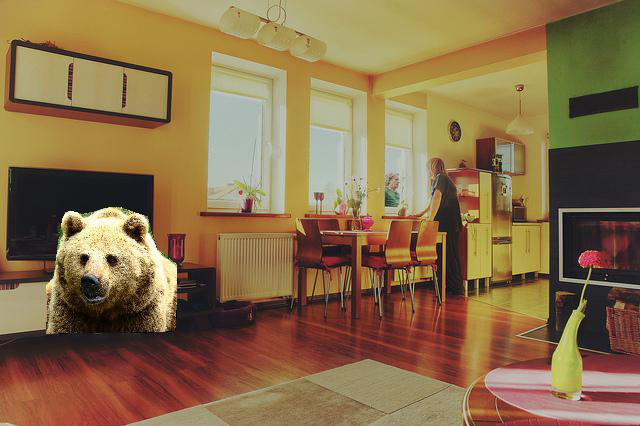

Image id: 139
Original object annotations: [26547, 34646, 35802, 103487, 104368, 105328, 110334, 230831, 233201, 1640282, 1647285, 1648594, 1654394, 1666628, 1667817, 1669970, 1941808, 2146194, 2146548, 2204286]
OOC object annotation {'image_id': 285, 'coco_ann_id': 587562, 'bbox': [207, 45, 132, 127]}


In [6]:
coco_ooc_root_dir = '/WorkSpace-2/aroy/data/OOC/COCO_OOC/coco_ooc_dataset'

image_path      = os.path.join(coco_ooc_root_dir, 'images/COCO_val2014_000000000139_var1_14_0.jpg')
image = Image.open(image_path) 
display(image)
annotation_path = os.path.join(coco_ooc_root_dir, 'annotations/COCO_val2014_000000000139_var1_14_0.npy')
annotation = np.load(annotation_path, allow_pickle=True).item()
print("Image id:", annotation['image_id'])
print("Original object annotations:", annotation['original_ann_ids'])
print("OOC object annotation", annotation['ooc_annotation'])

In [8]:
anns = coco_annotation.loadAnns(2204286)
category_id = anns[0]['category_id']
bbox = anns[0]['bbox']
print (f'object id: {category_id}, bbox: {bbox}')

object id: 67, bbox: [321.21, 231.22, 125.56, 88.93]
